# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | yagry
City not found. Skipping...
Processing Record 4 of Set 1 | anadyr
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | laminusa
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | lihue
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | la passe
Processing Record 13 of Set 1 | nogliki
Processing Record 14 of Set 1 | katsuren-haebaru
Processing Record 15 of Set 1 | margaret river
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | vorgashor
Processing Record 18 of Set 1 | visby
Processing Record 19 of Set 1 | dzuunmod
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | p

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,11.73,87,100,2.57,US,1726347099
1,anadyr,64.7500,177.4833,7.28,93,75,5.00,RU,1726347101
2,cabo san lucas,22.8909,-109.9124,29.86,88,29,4.47,MX,1726347103
3,sitka,57.0531,-135.3300,13.94,77,40,0.00,US,1726347104
4,laminusa,5.5549,120.9136,28.26,78,96,7.71,PH,1726347105


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,11.73,87,100,2.57,US,1726347099
1,anadyr,64.7500,177.4833,7.28,93,75,5.00,RU,1726347101
2,cabo san lucas,22.8909,-109.9124,29.86,88,29,4.47,MX,1726347103
3,sitka,57.0531,-135.3300,13.94,77,40,0.00,US,1726347104
4,laminusa,5.5549,120.9136,28.26,78,96,7.71,PH,1726347105


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

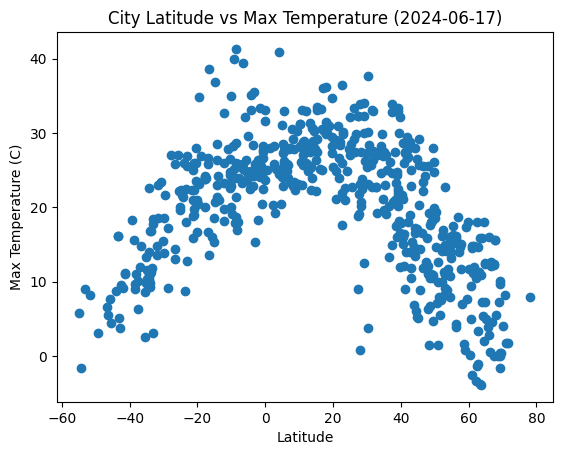

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs Max Temperature (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

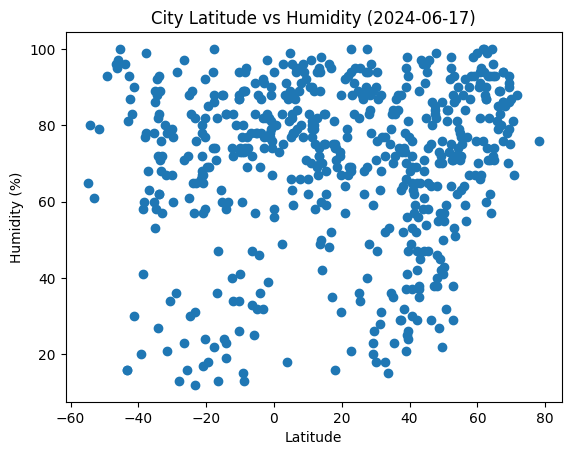

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker = 'o')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

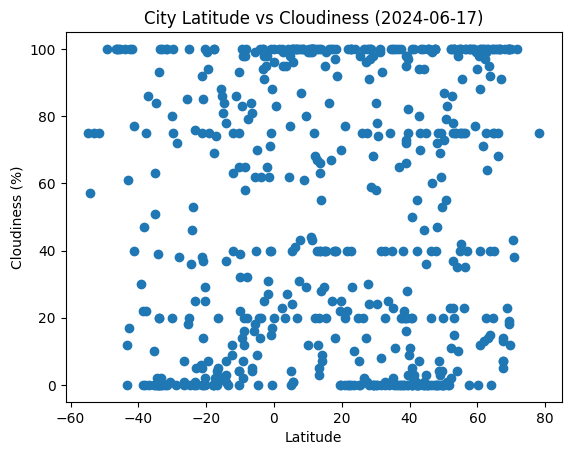

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker = 'o')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

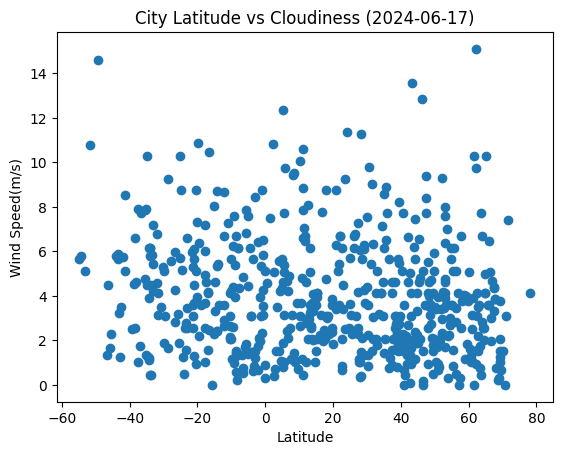

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker = 'o')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs Cloudiness (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
def linreg_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_val = x * slope + intercept
    line_eq = f"y ={round(slope,2)}x +{round(slope,2)}"
    plt.scatter(x, y)
    plt.plot(x, regress_val, "r-")
    plt.annotate(line_eq, (0.1,0.1), fontsize=13, color="r")
    print(f"The r-value is: {rvalue}")


In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,11.73,87,100,2.57,US,1726347099
1,anadyr,64.7500,177.4833,7.28,93,75,5.00,RU,1726347101
2,cabo san lucas,22.8909,-109.9124,29.86,88,29,4.47,MX,1726347103
3,sitka,57.0531,-135.3300,13.94,77,40,0.00,US,1726347104
4,laminusa,5.5549,120.9136,28.26,78,96,7.71,PH,1726347105


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,atafu village,-8.5421,-172.5159,28.64,74,98,6.70,TK,1726347108
8,port-aux-francais,-49.3500,70.2167,3.10,93,100,14.58,TF,1726347111
12,margaret river,-33.9500,115.0667,11.00,83,0,5.79,AU,1726347117
13,blackmans bay,-43.0167,147.3167,5.07,81,61,3.25,AU,1726347118
17,edinburgh of the seven seas,-37.0676,-12.3116,12.02,68,86,1.74,SH,1726347123


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7445536078815126


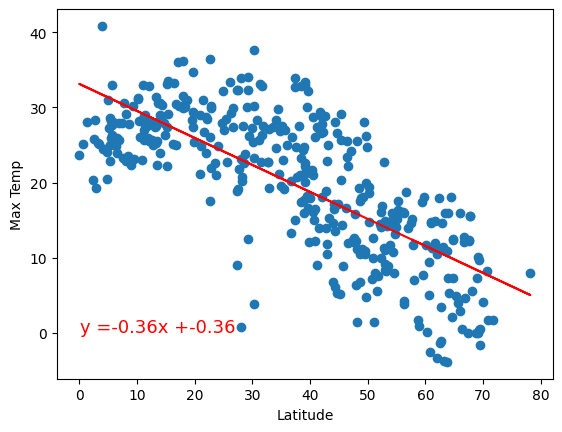

In [52]:
# Linear regression on Northern Hemisphere
linreg_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.761193936057104


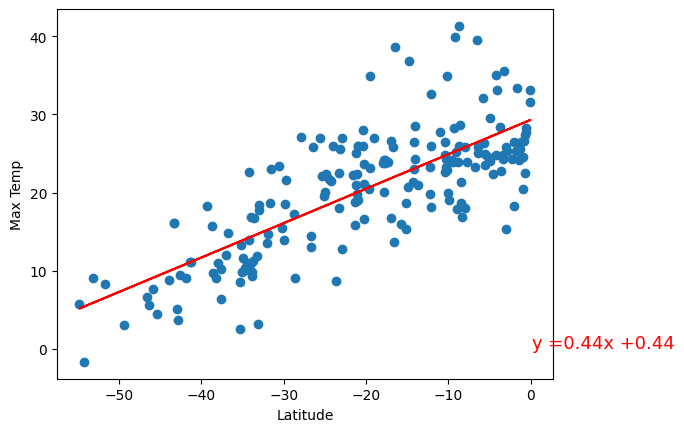

In [53]:
# Linear regression on Southern Hemisphere
linreg_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:
- The Northern Hemisphere has a strong negative correlation between temp vs lat. We can see that when temp increases, lat decreases.
- The Southern Hemisphere has a strong positive correlation between temp vs lat. We can see that when temp increases, so does lat.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.015179883034877984


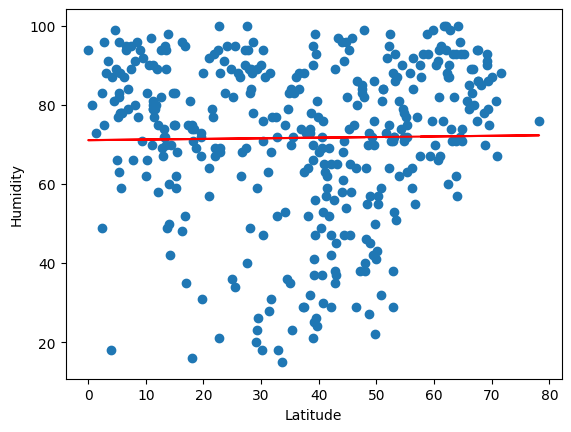

In [54]:
# Northern Hemisphere
linreg_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: -0.013892325351499233


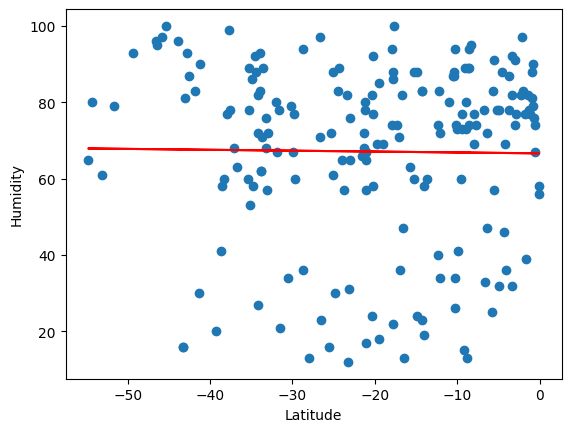

In [55]:
# Southern Hemisphere
linreg_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
- Both the Northern and Southern charts show no positive or negative correlation between humidity and lat, however, when looking at the city plots that are closer to the equator have a humidity level higher than 60%.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.01265331461234564


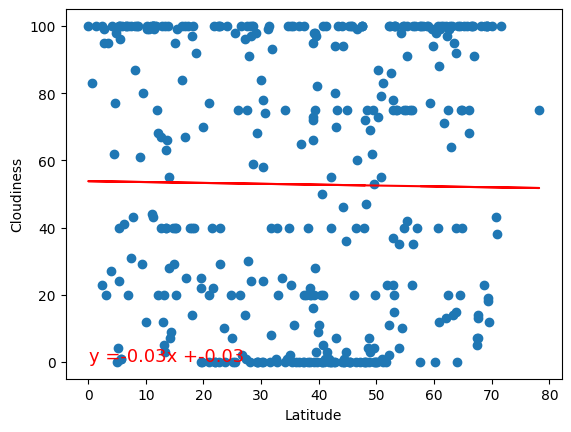

In [56]:
# Northern Hemisphere
linreg_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.012739990765890262


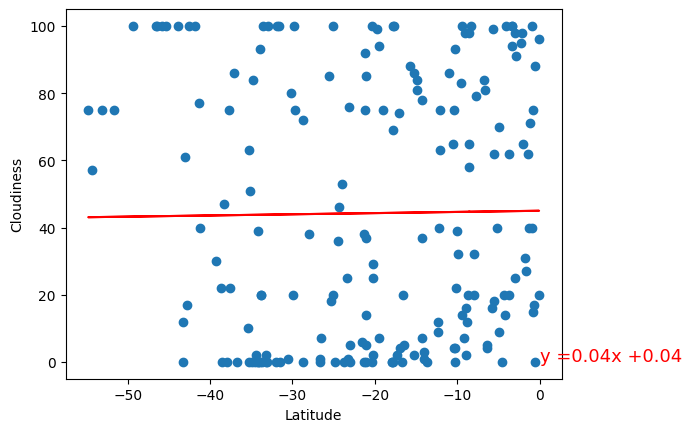

In [57]:
# Southern Hemisphere
linreg_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** 
- No true positive or negative correlation for both Northern and Southern Hemisphere, but we can see that the Northern areas are cloudier than the Southern.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10948930120506525


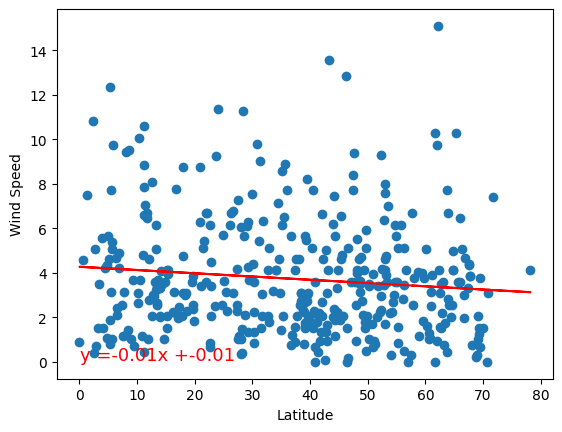

In [58]:
# Northern Hemisphere
linreg_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.2013424711568998


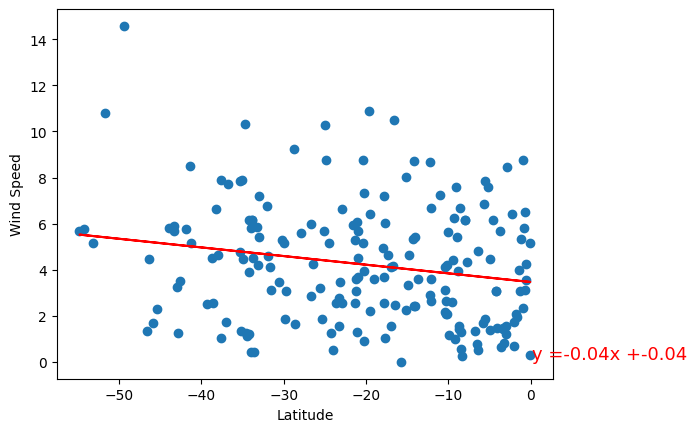

In [59]:
# Southern Hemisphere
linreg_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 
- The Northern Hemisphere has a slight negative correction, but not by much. 
- The Southern Hemisphere has a slightly larger negative correction to the Northern area between the wind speed and lat.